In [59]:
# Read csv, pick Arma 3 as the game to analyze and keep relevant columns.

import pandas as pd

df_full = pd.read_csv('data\\steam_reviews.csv', index_col=0)

df = df_full[df_full['app_name'] == 'Arma 3']
df = df.drop('review_votes', axis=1)

df.head()

,app_name,review_text,review_score
app_id,,,
107410,Arma 3,This is not a game for people who want fast ac...,1
107410,Arma 3,Oh man. Where to even begin with this one. It ...,1
107410,Arma 3,My first game on A3 brought me the most horrif...,1
107410,Arma 3,I spent several years in the army and I gotta ...,1
107410,Arma 3,Having accumulated over 13400 hours in-game wi...,1


In [60]:
# Check number of reviews per score

df.groupby(['app_name', 'review_score']).size()

app_name  review_score
Arma 3    -1               3600
           1              28708
dtype: int64

In [61]:
# Balance the df based on review_score to make the future models evaluation metrics clearer

g = df.groupby('review_score')
df = pd.DataFrame(g.apply(lambda x: x.sample(g.size().min())).reset_index(drop=True))
df.groupby(['app_name', 'review_score']).size()

########### kör denna efter texten bearbetats?
#def strLen(text):
#    return len(str(text))


#df['review_length'] = df['review_text'].apply(strLen)

#mean_len = df.groupby('review_score')['review_length'].mean()
#print(mean_len)


app_name  review_score
Arma 3    -1              3600
           1              3600
dtype: int64

Review mean length:
review_score
-1    424.478333
 1    256.118056
Name: review_length, dtype: float64


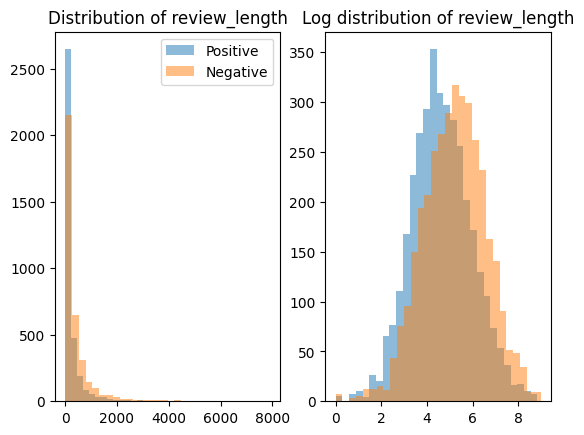

In [62]:
# Print the mean lengths of review_text per review_score.
# Plot the distributions of the lengths.

import matplotlib.pyplot as plt
import math

def len_str(text):
    return len(str(text))

df['review_length'] = df['review_text'].apply(len_str)

mean_review_length = df.groupby('review_score')['review_length'].mean()
print(f'Review mean length:\n{mean_review_length}')

df['review_length_log'] = df['review_length'].apply(math.log)

positive = df[df['review_score'] == 1]
negative = df[df['review_score'] == -1]

fig, axs = plt.subplots(1, 2)
axs[0].hist(positive['review_length'], alpha=0.5, bins=30, label='Positive')
axs[0].hist(negative['review_length'], alpha=0.5, bins=30, label='Negative')
axs[1].hist(positive['review_length_log'], alpha=0.5, bins=30, label='Positive')
axs[1].hist(negative['review_length_log'], alpha=0.5, bins=30, label='Negative')
axs[0].title.set_text('Distribution of review_length')
axs[1].title.set_text('Log distribution of review_length')
axs[0].legend()
plt.show()

In [63]:
# Credit for this cell to https://www.kaggle.com/code/andreshg/nlp-glove-bert-tf-idf-lstm-explained

# Clean the column review_text and create a new column with the result.

import re
import string

def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

df['review_clean'] = df['review_text'].apply(clean_text)
df.head()

,app_name,review_text,review_score,review_length,review_length_log,review_clean
0,Arma 3,"I want to recommend this game, I truly do. But...",-1,231,5.442418,i want to recommend this game i truly do but i...
1,Arma 3,Arma 3 is an awesome game! Players are young s...,-1,910,6.813445,arma is an awesome game players are young sel...
2,Arma 3,i am ♥♥♥♥♥♥ off so bad right now i cant connec...,-1,99,4.595120,i am ♥♥♥♥♥♥ off so bad right now i cant connec...
3,Arma 3,I hate this game best army simulator as of ...,-1,80,4.382027,i hate this game best army simulator as of ...
4,Arma 3,"Arma 3 Was a deception, finding out they built...",-1,421,6.042633,arma was a deception finding out they built t...


In [81]:
# Credit for this cell to https://www.kaggle.com/code/andreshg/nlp-glove-bert-tf-idf-lstm-explained

# Remove english stopwords from column 'review_clean' with the function remove_stopwords

import stopwords
stop_words = stopwords.get_stopwords('english')
more_stopwords = ['play', 'game', 'arma', 'will']
stop_words = stop_words + more_stopwords

def remove_stopwords(text):
    text = ' '.join(word for word in text.split(' ') if word not in stop_words)
    return text

df['review_clean'] = df['review_clean'].apply(remove_stopwords)
df.head()

,app_name,review_text,review_score,review_length,review_length_log,review_clean,review_score_target
0,Arma 3,"I want to recommend this game, I truly do. But...",-1,231,5.442418,want recommend truli hard cant much besid camp...,0
1,Arma 3,Arma 3 is an awesome game! Players are young s...,-1,910,6.813445,awesom player young self serv short fuse mille...,0
2,Arma 3,i am ♥♥♥♥♥♥ off so bad right now i cant connec...,-1,99,4.595120,♥♥♥♥♥♥ bad right now cant connect server reall...,0
3,Arma 3,I hate this game best army simulator as of ...,-1,80,4.382027,hate best armi simul date still hate,0
4,Arma 3,"Arma 3 Was a deception, finding out they built...",-1,421,6.042633,decept find built engin use sin huge mistak be...,0


In [82]:
# Credit for this cell to https://www.kaggle.com/code/andreshg/nlp-glove-bert-tf-idf-lstm-explained

# Stemm the words in column 'review_clean' with the function stemm_text

import nltk

stemmer = nltk.SnowballStemmer('english')

def stemm_text(text):
    text = ' '.join(stemmer.stem(word) for word in text.split(' '))
    return text

df['review_clean'] = df['review_clean'].apply(stemm_text)
df.head()

,app_name,review_text,review_score,review_length,review_length_log,review_clean,review_score_target
0,Arma 3,"I want to recommend this game, I truly do. But...",-1,231,5.442418,want recommend truli hard cant much besid camp...,0
1,Arma 3,Arma 3 is an awesome game! Players are young s...,-1,910,6.813445,awesom player young self serv short fuse mille...,0
2,Arma 3,i am ♥♥♥♥♥♥ off so bad right now i cant connec...,-1,99,4.595120,♥♥♥♥♥♥ bad right now cant connect server reall...,0
3,Arma 3,I hate this game best army simulator as of ...,-1,80,4.382027,hate best armi simul date still hate,0
4,Arma 3,"Arma 3 Was a deception, finding out they built...",-1,421,6.042633,decept find built engin use sin huge mistak be...,0


In [83]:
# Create a column 'review_score_target' with 0 and 1 as values instead of
# -1 and 1 which can be found in 'review_score'.
# Create x and y variables to be used for modeling and double check that their
# sizes are equal.

def targetEncoded(toEncode):
    return 1 if toEncode == 1 else 0

df['review_score_target'] = df['review_score'].apply(targetEncoded)

x = df['review_clean']
y = df['review_score_target']

print(f'{len(x) = }, {len(y) = }')
df.groupby(['review_score', 'review_score_target']).size()

len(x) = 7200, len(y) = 7200


review_score  review_score_target
-1            0                      3600
 1            1                      3600
dtype: int64

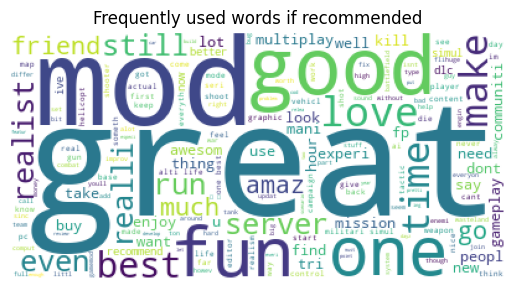

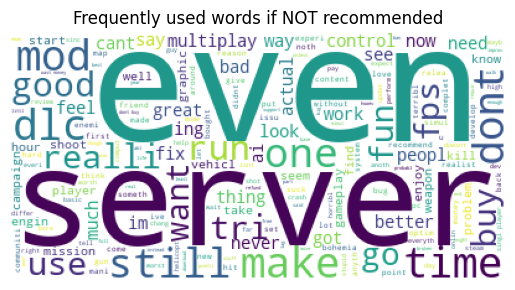

In [84]:
# Make wordclouds for words used in recommended reviews and not recommended reviews

from wordcloud import WordCloud

wc = WordCloud(background_color='white', max_words=200)

wc.generate(' '.join(text for text in df.loc[df['review_score_target'] == 1, 'review_clean']))
plt.axis('off')
plt.title('Frequently used words if recommended')
plt.imshow(wc)
plt.show()

wc.generate(' '.join(text for text in df.loc[df['review_score_target'] == 0, 'review_clean']))
plt.axis('off')
plt.title('Frequently used words if NOT recommended')
plt.imshow(wc)
plt.show()

In [65]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)
print(len(x_train), len(y_train))
print(len(x_test), len(y_test))


5400 5400
1800 1800


In [66]:

from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(stop_words=None, ngram_range=(1, 1), max_features=100)
vect.fit(x_train) # Creates a dictionary of all the words and maps each word in the output matrix

x_train_dtm = vect.transform(x_train) # Transforms the dataset to the vect dictonary
x_test_dtm = vect.transform(x_test) # Transforms the dataset to the vect dictonary


In [67]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()

tfidf_transformer.fit(x_train_dtm)
x_train_tfidf = tfidf_transformer.transform(x_train_dtm)

#x_train_tfidf
print(vect.get_feature_names_out())
print(tfidf_transformer.get_feature_names_out())

['actual' 'ai' 'also' 'amaz' 'arma' 'around' 'back' 'bad' 'best' 'better'
 'bohemia' 'bug' 'buy' 'campaign' 'can' 'cant' 'communiti' 'content'
 'control' 'die' 'dlc' 'dont' 'enemi' 'enjoy' 'even' 'ever' 'everi' 'feel'
 'find' 'first' 'fix' 'fps' 'friend' 'fun' 'game' 'gameplay' 'get' 'give'
 'go' 'good' 'got' 'graphic' 'great' 'gun' 'hour' 'im' 'ive' 'just' 'kill'
 'know' 'life' 'like' 'look' 'lot' 'love' 'make' 'mani' 'map' 'militari'
 'mission' 'mod' 'money' 'much' 'multiplay' 'need' 'never' 'new' 'now'
 'one' 'pc' 'peopl' 'play' 'player' 'realist' 'realli' 'recommend' 'run'
 'say' 'see' 'server' 'set' 'shoot' 'simul' 'start' 'still' 'take' 'thing'
 'think' 'time' 'tri' 'use' 'vehicl' 'want' 'way' 'weapon' 'well' 'will'
 'work' 'worth' 'your']
['x0' 'x1' 'x2' 'x3' 'x4' 'x5' 'x6' 'x7' 'x8' 'x9' 'x10' 'x11' 'x12' 'x13'
 'x14' 'x15' 'x16' 'x17' 'x18' 'x19' 'x20' 'x21' 'x22' 'x23' 'x24' 'x25'
 'x26' 'x27' 'x28' 'x29' 'x30' 'x31' 'x32' 'x33' 'x34' 'x35' 'x36' 'x37'
 'x38' 'x39' 'x40' 'x41

In [35]:
# Get weights of words
from sklearn.feature_extraction.text import TfidfVectorizer

vect = TfidfVectorizer()
tfidf_matrix = vect.fit_transform(x_train[:1000])
df = pd.DataFrame(tfidf_matrix.toarray(), columns = vect.get_feature_names_out())
print(df)

      aa  aaa  abandon  abil  abileti  abili  abl  absent  absolut  \
0    0.0  0.0      0.0   0.0      0.0    0.0  0.0     0.0      0.0   
1    0.0  0.0      0.0   0.0      0.0    0.0  0.0     0.0      0.0   
2    0.0  0.0      0.0   0.0      0.0    0.0  0.0     0.0      0.0   
3    0.0  0.0      0.0   0.0      0.0    0.0  0.0     0.0      0.0   
4    0.0  0.0      0.0   0.0      0.0    0.0  0.0     0.0      0.0   
..   ...  ...      ...   ...      ...    ...  ...     ...      ...   
995  0.0  0.0      0.0   0.0      0.0    0.0  0.0     0.0      0.0   
996  0.0  0.0      0.0   0.0      0.0    0.0  0.0     0.0      0.0   
997  0.0  0.0      0.0   0.0      0.0    0.0  0.0     0.0      0.0   
998  0.0  0.0      0.0   0.0      0.0    0.0  0.0     0.0      0.0   
999  0.0  0.0      0.0   0.0      0.0    0.0  0.0     0.0      0.0   

     absolutelti  ...  youv  zed  zero      zeus  zip  zipti  zombi  zubr  \
0            0.0  ...   0.0  0.0   0.0  0.000000  0.0    0.0    0.0   0.0   
1    

In [68]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

# Train the model
nb.fit(x_train_dtm, y_train)

y_pred_class = nb.predict(x_test_dtm)
y_pred_prob = nb.predict_proba(x_test_dtm)[:, 1]
print(y_pred_prob)

[0.66860857 0.03765038 0.49102583 ... 0.07935149 0.92050469 0.22061141]


In [69]:
# change when set is balanced
null_accuracy = y_test.value_counts().head(1) / len(y_test)
print(null_accuracy)

# manual null accuracy
print(108327 / (108327 + 16673))

108327

review_score_target
0    0.508333
Name: count, dtype: float64
0.866616


108327

In [70]:
from sklearn import metrics
from sklearn.metrics import classification_report
print(metrics.accuracy_score(y_test, y_pred_class))
print(f'ROC: {metrics.roc_auc_score(y_test, y_pred_prob)}')
print(classification_report(y_test, y_pred_class))


print(f'confusion matrix: \n[TN FP\nFN TP]\n{metrics.confusion_matrix(y_test, y_pred_class)}')


0.7244444444444444
ROC: 0.7999357846315335
              precision    recall  f1-score   support

           0       0.75      0.68      0.72       915
           1       0.70      0.77      0.73       885

    accuracy                           0.72      1800
   macro avg       0.73      0.73      0.72      1800
weighted avg       0.73      0.72      0.72      1800

confusion matrix: 
[TN FP
FN TP]
[[626 289]
 [207 678]]


In [42]:
FP = x_test[(y_pred_class == 1) & (y_test == 0)]
FN = x_test[(y_pred_class == 0) & (y_test == 1)]

100%|██████████| 100/100 [09:31<00:00,  5.72s/it]


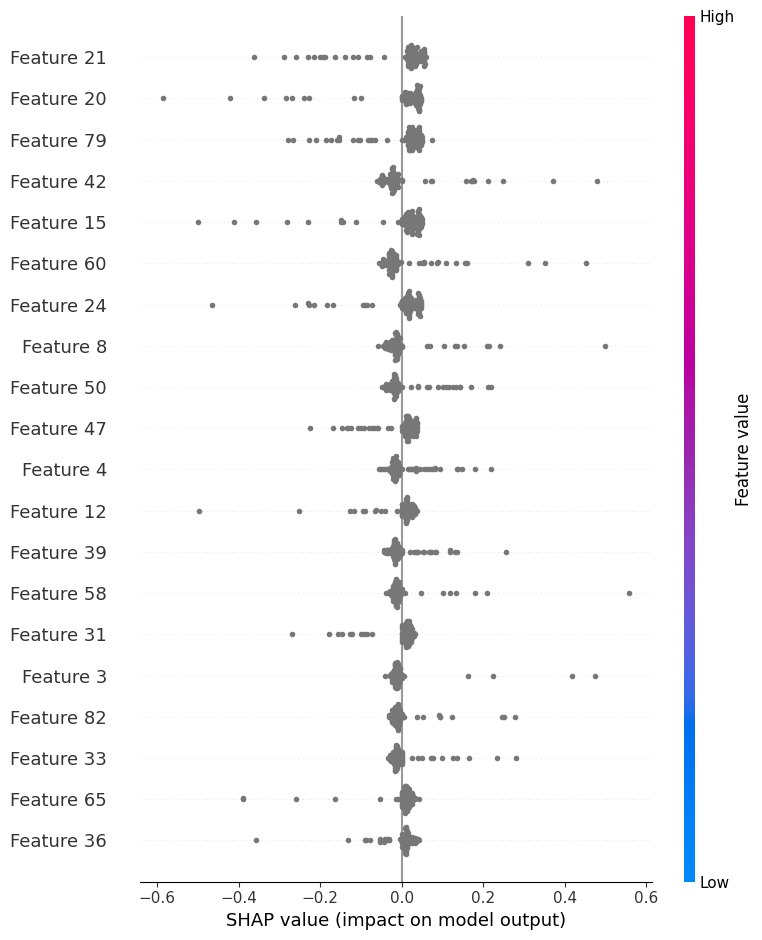

In [71]:
import shap
shap.initjs()
x_test_dtm_sample = shap.sample(x_train_dtm, 100)
explainer = shap.KernelExplainer(nb.predict, x_test_dtm_sample)
shap_values = explainer.shap_values(x_test_dtm_sample)
shap.summary_plot(shap_values, x_test_dtm_sample)

In [3]:
import numpy as np
print(np.__version__)

1.25.2
